# 1. Import Library

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料預處理

In [2]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [3]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [4]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [11]:
y_TestOneHot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# 建立模型

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [17]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [18]:
model.add(Dropout(0.25))

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(128, activation='relu'))

In [21]:
model.add(Dropout(0.5))

In [22]:
model.add(Dense(10,activation='softmax'))

In [23]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

# 訓練模型

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [25]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 39s - loss: 0.4916 - acc: 0.8467 - val_loss: 0.0973 - val_acc: 0.9717
Epoch 2/20
 - 43s - loss: 0.1407 - acc: 0.9582 - val_loss: 0.0624 - val_acc: 0.9807
Epoch 3/20
 - 43s - loss: 0.1021 - acc: 0.9695 - val_loss: 0.0516 - val_acc: 0.9838
Epoch 4/20
 - 44s - loss: 0.0840 - acc: 0.9754 - val_loss: 0.0449 - val_acc: 0.9859
Epoch 5/20
 - 43s - loss: 0.0718 - acc: 0.9779 - val_loss: 0.0389 - val_acc: 0.9879
Epoch 6/20
 - 43s - loss: 0.0641 - acc: 0.9807 - val_loss: 0.0394 - val_acc: 0.9881
Epoch 7/20
 - 43s - loss: 0.0562 - acc: 0.9830 - val_loss: 0.0416 - val_acc: 0.9881
Epoch 8/20
 - 43s - loss: 0.0504 - acc: 0.9843 - val_loss: 0.0333 - val_acc: 0.9906
Epoch 9/20
 - 43s - loss: 0.0449 - acc: 0.9866 - val_loss: 0.0338 - val_acc: 0.9903
Epoch 10/20
 - 43s - loss: 0.0432 - acc: 0.9867 - val_loss: 0.0335 - val_acc: 0.9905
Epoch 11/20
 - 43s - loss: 0.0404 - acc: 0.9879 - val_loss: 0.0328 - val_acc: 0.9903
Epoch 12/20
 - 43s - los

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

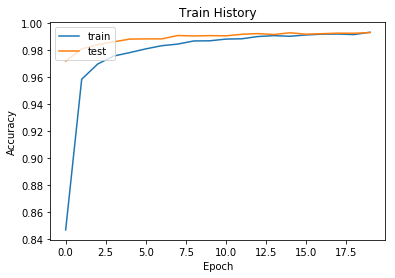

In [27]:
show_train_history('acc','val_acc')

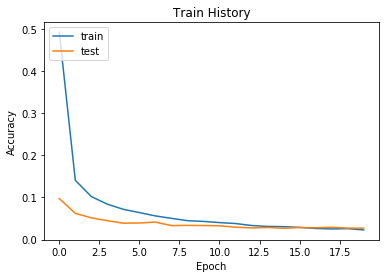

In [28]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [29]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 2s 247us/step


0.9936

# 預測結果

In [30]:
prediction=model.predict_classes(x_Test4D_normalize)

In [31]:
pp=Predicted_Probability=model.predict(x_Test4D_normalize)

In [32]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

# 查看預測結果

In [41]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=30):
    fig = plt.gcf()
    fig.set_size_inches(15, 15)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,6, 1+i)#分成10*1的排列方式
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     +'pp='+str(pp[idx].max())
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

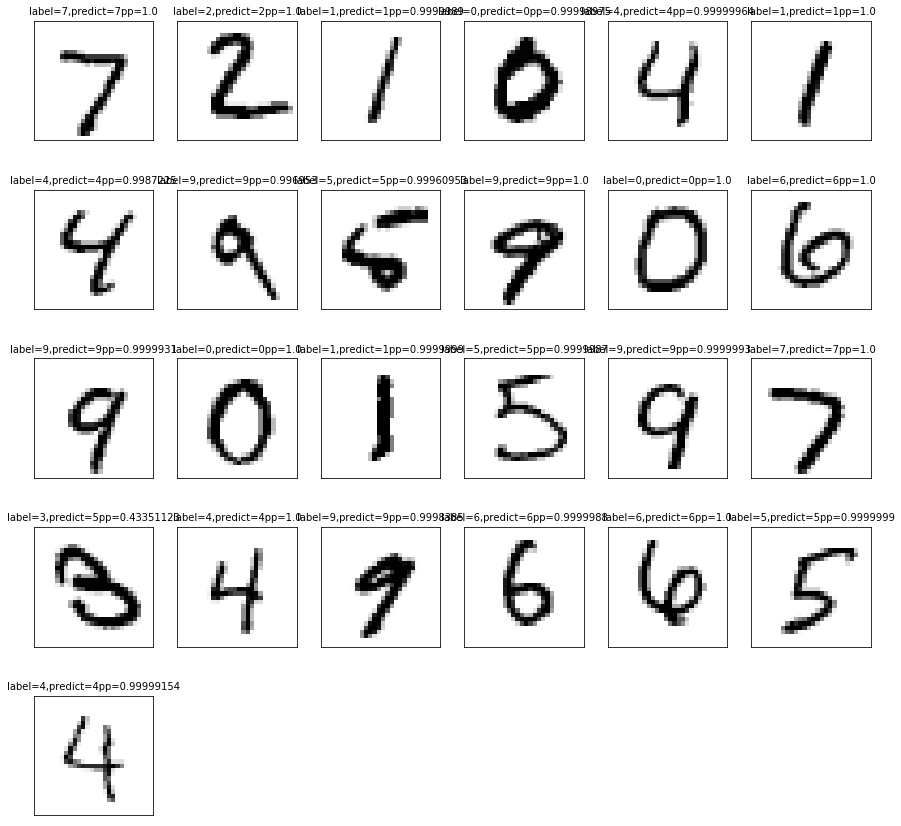

In [42]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [43]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,0,0,0,0,0,2,1,1,0
1,0,1133,1,0,0,1,0,0,0,0
2,1,1,1027,0,0,0,0,2,1,0
3,0,0,0,1004,0,4,0,0,2,0
4,0,0,0,0,976,0,1,0,2,3
5,1,0,0,3,0,886,1,0,0,1
6,2,2,0,0,2,1,951,0,0,0
7,0,3,2,0,1,0,0,1017,1,4
8,1,0,1,1,0,1,0,0,968,2


In [44]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [45]:
df

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [33]:
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2597,5,3
5937,5,3


In [53]:
df[(df.label!=df.predict)]

,label,predict
18,3,5
445,6,0
449,3,5
625,6,4
659,2,1
740,4,9
947,8,9
1014,6,5
1039,7,1
1112,4,6


In [54]:
y_mistake = df[(df.label!=df.predict)]['label']

In [55]:
y_pred = df[(df.label!=df.predict)]['predict']

In [56]:
idx1 = list(df[(df.label!=df.predict)].index.values)

In [106]:
def plot_images_labels_prediction_findmistake(images,labels,prediction,idx,num=64):
    fig = plt.gcf()
    fig.set_size_inches(15, 15)
#     if num>20: num=20 
    for i in range(0, num):
        ax=plt.subplot(16,4, 1+i)
        ax.imshow(images[idx[i]], cmap='binary')

        ax.set_title("label=" +str(labels[idx[i]])+
                     ",predict="+str(prediction[idx[i]])
                     +'pp='+str(pp[idx[i]].max())
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
    plt.show()


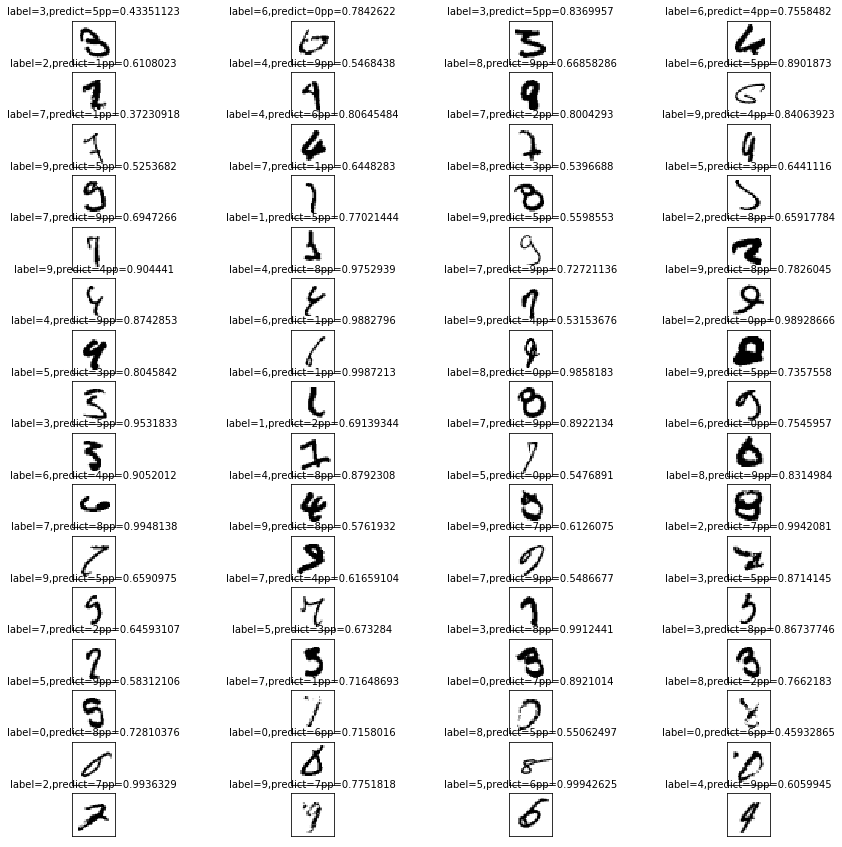

In [107]:
plot_images_labels_prediction_findmistake(x_Test,y_Test,prediction,idx1)
